In [1]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
import cv2 

In [2]:
log = 'output/13thSyncFinal.csv'
video = 'input/13th australia queensland.avi'
outlog = 'output/13th 9 australia queensland.csv'
outvideo = 'output/13thaustralia queensland.avi'
framesPerSec = 9

In [22]:
capVid = cv2.VideoCapture(video)
frames = int(capVid.get(cv2.CAP_PROP_FRAME_COUNT))
print(frames)

4395


In [23]:
offset = 0
time = 6 * 60 + 6
framesPerSec = (frames / time) + offset
print(framesPerSec)

12.008196721311476


In [54]:
df = pd.read_csv('input/13th australia queensland.csv', names=["P3D", "date time", "pitch", "yaw", "roll", "speed", "altitude"])
df.head()
df['time'] = df['date time'].str[12:-4]
df.shape

(21689, 8)

In [55]:
df_count = df['time'].value_counts().sort_index()
df_count = df_count.to_frame().reset_index()
df_count.head()
dfOut = df.copy()
df_count.rename(columns={"index": "index", "time": "count"}, inplace=True)
df_count.head()

,index,count
0,11:16:54,56
1,11:16:55,59
2,11:16:56,61
3,11:16:57,59
4,11:16:58,58


In [76]:
dfSync = pd.read_csv(log)
df_fps = dfSync['SyncTime'].value_counts().sort_index()
df_fps = df_fps.to_frame().reset_index()
df_count['fps'] = df_fps['SyncTime']
new_df = pd.DataFrame({'fps': [7]}, index=[366])
df_count.update(new_df)
df_count['every'] = df_count['count']//df_count['fps']
df_count

,index,count,fps,every
0,11:16:54,56,4.0,14.0
1,11:16:55,59,9.0,6.0
2,11:16:56,61,9.0,6.0
3,11:16:57,59,9.0,6.0
4,11:16:58,58,10.0,5.0
...,...,...,...,...
362,11:22:56,60,8.0,7.0
363,11:22:57,60,10.0,6.0
364,11:22:58,60,7.0,8.0
365,11:22:59,60,7.0,8.0


In [67]:
dfOut.tail()

,P3D,date time,pitch,yaw,roll,speed,altitude,time
21684,P3D,2020-08-09 11:22:59:775,8.6453,340.3289,5.8017,388.4174,10330.24,11:22:59
21685,P3D,2020-08-09 11:22:59:776,8.6438,340.3261,5.7992,388.4771,10328.93,11:22:59
21686,P3D,2020-08-09 11:22:59:776,8.6424,340.3234,5.7966,388.5366,10327.62,11:22:59
21687,P3D,2020-08-09 11:23:00:198,8.5816,340.2157,5.6952,390.8714,10276.03,11:23:00
21688,P3D,2020-08-09 11:23:00:198,8.5802,340.2132,5.6928,390.9261,10274.81,11:23:00


In [77]:
df_out = pd.DataFrame()
df_time = pd.DataFrame()
i = 0
for (time, group) in dfOut.groupby('time'):
    framesPerSec = int(df_count.iloc[i]['fps'])
    df_out = df_out.append(pd.DataFrame(group.groupby(group.index//df_count.iloc[i]['every'], as_index=False).mean().head(framesPerSec)), ignore_index=True)
    df_i = pd.DataFrame({'time': [time]})
    for a in range(framesPerSec):
        df_time = df_time.append(df_i, ignore_index=True)
    
    i = i + 1

In [68]:
i

367

In [78]:
df_final = df_out.join(df_time)
df_final

,pitch,yaw,roll,speed,altitude,time
0,0.973236,26.960000,0.003907,0.028971,21.988000,11:16:54
1,0.973036,26.960000,0.003600,0.029843,21.988007,11:16:54
2,0.970507,26.960000,0.005686,0.033343,21.988100,11:16:54
3,0.971771,26.960000,0.003321,0.033336,21.988100,11:16:54
4,0.972025,26.960000,0.004450,0.034350,21.988100,11:16:55
...,...,...,...,...,...,...
3326,8.691950,340.416737,5.884762,386.519062,10371.582500,11:22:59
3327,8.680388,340.394487,5.863738,386.992175,10361.153750,11:22:59
3328,8.668788,340.372487,5.842938,387.478263,10350.817500,11:22:59
3329,8.657425,340.351225,5.822850,387.933987,10340.801250,11:22:59


In [79]:
df_final.to_csv('output/13thFinalLog.csv')

In [42]:
df_count = df['time'].value_counts().sort_index()//framesPerSec
df_count = df_count.to_frame().reset_index()
df_count.head()
dfOut = df.copy()
df_count.rename(columns={"index": "index", "time": "count"}, inplace=True)

In [74]:
df_out = pd.DataFrame()
df_time = pd.DataFrame()
i = 0
for (time, group) in dfOut.groupby('time'):
    df_out = df_out.append(pd.DataFrame(group.groupby(group.index//df_count.iloc[i]['count'], as_index=False).mean().head(framesPerSec)), ignore_index=True)
    df_i = pd.DataFrame({'time': [time]})
    for a in range(framesPerSec):
        df_time = df_time.append(df_i, ignore_index=True)
    
    i = i + 1

In [75]:
df_final = df_out.join(df_time)
df_final.shape

(728, 6)

In [45]:
df_final.to_csv(outlog)

Verify Sync

In [36]:
dfSync = pd.read_csv(outlog)

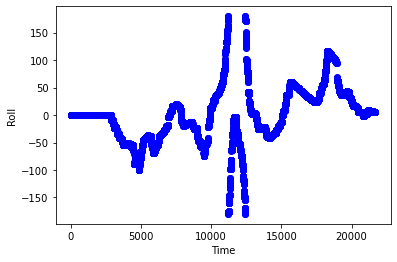

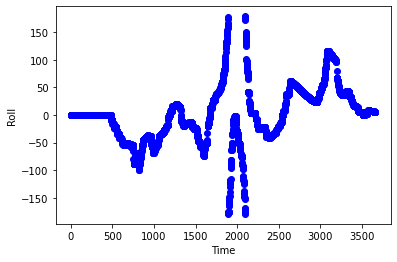

In [37]:
plt.scatter([df.index], [df.roll],  color='blue')
plt.xlabel("Time")
plt.ylabel("Roll")
plt.show()
plt.scatter([dfSync.index], [dfSync.roll],  color='blue')
plt.xlabel("Time")
plt.ylabel("Roll")
plt.show()

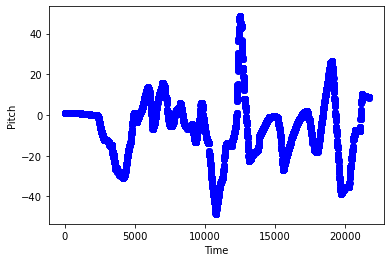

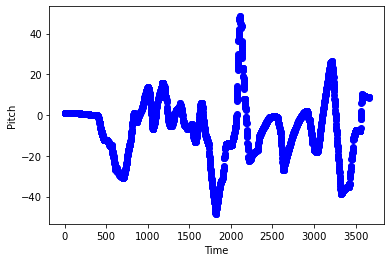

In [38]:
plt.scatter([df.index], [df.pitch],  color='blue')
plt.xlabel("Time")
plt.ylabel("Pitch")
plt.show()
plt.scatter([dfSync.index], [dfSync.pitch],  color='blue')
plt.xlabel("Time")
plt.ylabel("Pitch")
plt.show()


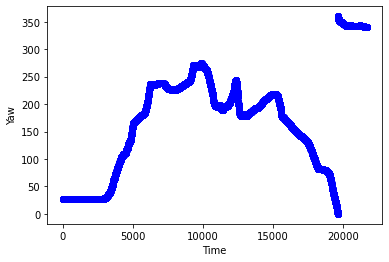

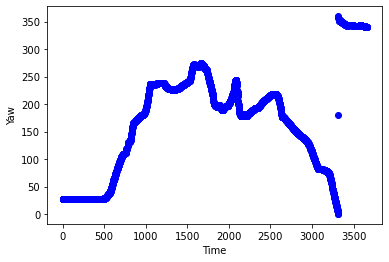

In [39]:
plt.scatter([df.index], [df.yaw],  color='blue')
plt.xlabel("Time")
plt.ylabel("Yaw")
plt.show()
plt.scatter([dfSync.index], [dfSync.yaw],  color='blue')
plt.xlabel("Time")
plt.ylabel("Yaw")
plt.show()

In [4]:
dfSync = pd.read_csv('output/13thFinalLog.csv')
cap = cv2.VideoCapture(video) 
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
out = cv2.VideoWriter('output/13theverySec.avi' ,cv2.VideoWriter_fourcc('M','J','P','G'), 9, (frame_width,frame_height))
frameList = []
i = 0
while(True): 
    ret, frame = cap.read() 
    #pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
    #text = image_to_string(frame, lang='eng', config='--psm 6')
    #print(text)
    #result = re.findall(r"\d\d:\d\d:\d\d", text)
    #frameList.append(result[0])
    
    
    if(True):
        # describe the type of font 
        # to be used. 
        font = cv2.FONT_HERSHEY_SIMPLEX 
  
    # Use putText() method for 
    # inserting text on video 
        roll = dfSync.iloc[i]['roll']
        pitch = dfSync.iloc[i]['pitch']
        yaw = dfSync.iloc[i]['yaw']
        time = dfSync.iloc[i]['time']
        
        cv2.putText(frame,  
                'roll : {:.2f}'.format(roll),  
                (50, 60),  
                font, 1,  
                (0, 255, 255),  
                2,  
                cv2.LINE_4) 
        cv2.putText(frame,  
                'pitch :{:.2f}'.format(pitch),  
                (50, 80),  
                font, 1,  
                (0, 255, 255),  
                2,  
                cv2.LINE_4) 
        cv2.putText(frame,  
                'yaw :{:.2f}'.format(yaw),  
                (50, 100),  
                font, 1,  
                (0, 255, 255),  
                2,  
                cv2.LINE_4) 
        cv2.putText(frame,  
                'time :{}'.format(time),  
                (50, 120),  
                font, 1,  
                (0, 255, 255),  
                2,  
                cv2.LINE_4) 
  
    # Display the resulting frame 
        cv2.imshow('video', frame) 
        out.write(frame)
        i = i + 1
    # creating 'q' as the quit  
    # button for the video 
        if cv2.waitKey(10) & 0xFF == ord('q'): 
            break
  

# release the cap object 
cap.release() 
# close all windows 
cv2.destroyAllWindows() 

In [53]:
frameList

[]

In [108]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13439 sha256=0a3129d7f9afcb9b9ba62803edf086fcc0af7a501e5526552c33809615b9af4e
  Stored in directory: c:\users\sathish kasinathan\appdata\local\pip\cache\wheels\5e\48\64\518a6780b56aee06efa310fb23eaa144405b96429d13204e1e
Successfully built pytesseract


In [5]:
from PIL import Image
from pytesseract import *
im = Image.open('output/frame0.jpg')
pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
text = image_to_string(im, lang='eng', config='--psm 6')
print(text)


[tow ide Nova MoM Ostns ws anys ewe Tenle Wiley HOD
a
af ne —S
/,
a) 09.08.2020 11:16:54 AM ‘8 4 a8
ea i aan) ce


In [129]:
text[15:23]

'11:17:15'

In [130]:
from email import utils

In [131]:
date = utils.parsedate_to_datetime(text)
date.strftime('%H:%M:%S')

TypeError: cannot unpack non-iterable NoneType object

In [132]:
from datetime import datetime

In [138]:
d = datetime.strptime(text,'%m %d %y %H:%M:%S %z %Y')

ValueError: time data '_ -\n09.08.2020 11:17:15 ra\nre ——' does not match format '%m %d %y %H:%M:%S %z %Y'

In [139]:
import re

In [157]:
result = re.findall(r"\d\d:\d\d:\d\d", text)


In [159]:
frameTime=[]
frameTime.append(result[0])

In [160]:
result = re.findall(r"\d\d:\d\d:\d\d", text)
frameTime.append(result[0])

In [161]:
frameTime

['11:17:15', '11:17:15']

In [8]:
vidcap = cv2.VideoCapture(video)
success,image = vidcap.read()
count = 0
while success:
    cv2.imwrite("output/temp/%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1

vidcap.release() 